In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=38)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
# Define and train the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
23/23 [==============================] - 1s 12ms/step - loss: 0.6664 - accuracy: 0.5917 - val_loss: 0.6334 - val_accuracy: 0.6875
Epoch 2/5
23/23 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.7889 - val_loss: 0.5298 - val_accuracy: 0.8375
Epoch 3/5
23/23 [==============================] - 0s 5ms/step - loss: 0.4844 - accuracy: 0.8778 - val_loss: 0.4526 - val_accuracy: 0.9125
Epoch 4/5
23/23 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.9000 - val_loss: 0.3866 - val_accuracy: 0.9250
Epoch 5/5
23/23 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.9097 - val_loss: 0.3349 - val_accuracy: 0.9375


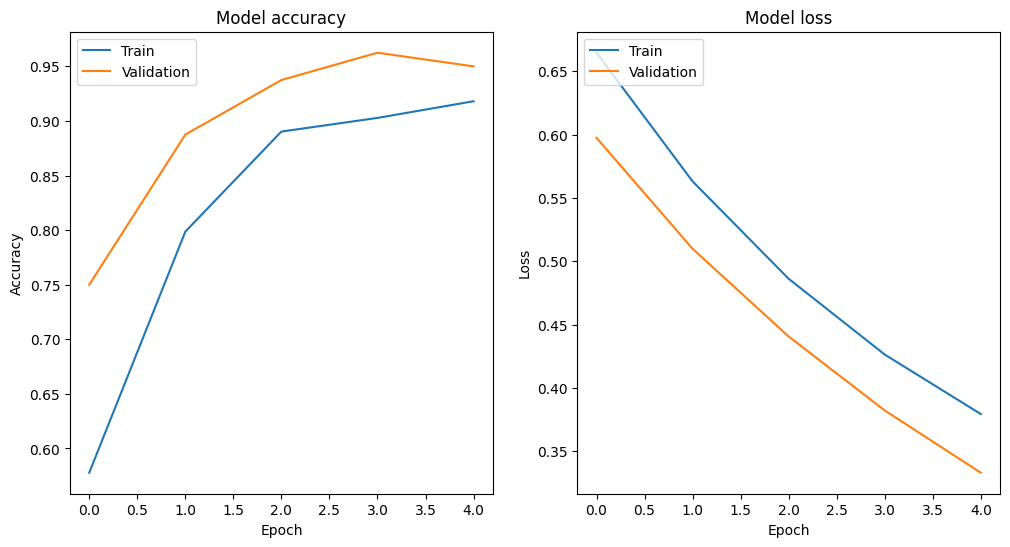

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Print Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Thresholding at 0.5
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

7/7 [==============================] - 0s 2ms/step
Test accuracy: 91.00%


In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93 13]
 [ 5 89]]


In [ ]:
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       106
           1       0.87      0.95      0.91        94

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

